# Dummy Dataset

Un dummy dataframe es un dataframe con variables creadas mediante metodos aleatorios, ya sea numericas o aleatorias.

In [2]:
%config IPCompleter.greedy=True

In [3]:
import pandas
import numpy

In [4]:
gender = ["Male","Female"]
status = ["Poor","Middle Class","Rich"]

In [5]:
n = 500
gender_data = []
status_data = []

for i in range(n):
    gender_data.append(numpy.random.choice(gender))
    status_data.append(numpy.random.choice(status))

In [6]:
height = 160 + 30*numpy.random.randn(n)
weight = 65 + 25*numpy.random.randn(n)
age = 30 + 12*numpy.random.randn(n)
income = 18000 + 3500*numpy.random.randn(n)

for i in range(n):
    age[i] = int(age[i])

In [7]:
datos = pandas.DataFrame(
    {
        "Age" : age,
        "Gender": gender_data,
        "Economic Status" : status_data,
        "Height" : height,
        "Weight" : weight,
        "Income" : income
    } #, index=range(50,50+n)    Para que empiece en el contador esfecifico que se desee
)

In [8]:
datos.head()

,Age,Gender,Economic Status,Height,Weight,Income
0,35.0,Male,Middle Class,221.724107,114.296850,14270.090832
1,29.0,Male,Rich,104.725161,76.439557,21010.555183
2,44.0,Female,Poor,159.466508,63.661109,23086.616995
3,35.0,Male,Middle Class,171.339368,57.497924,13030.658112
4,48.0,Female,Poor,168.377621,41.184477,18844.786412


## Agrupacion de datos

Se usa la funcion groupby() para agrupar los datos respecto a variables categoricas

In [9]:
#Se usa la funcion broupby() para agrupar los datos, dentro de los parentesis se especifica la(s) variable(s) respecto a la(s) 
# que se quiere categorizar.

grupos = datos.groupby("Gender")     #Objeto tipo grupos
grupos.groups

{'Female': Int64Index([  2,   4,   7,   8,   9,  10,  11,  13,  14,  19,
             ...
             477, 480, 484, 485, 487, 488, 489, 490, 492, 495],
            dtype='int64', length=254),
 'Male': Int64Index([  0,   1,   3,   5,   6,  12,  15,  16,  17,  18,
             ...
             482, 483, 486, 491, 493, 494, 496, 497, 498, 499],
            dtype='int64', length=246)}

In [10]:
# Este for recorre a grupos:
#grupos consta de dos variables, los nombres de los grupos y los grupos.

for nombre,grupo in grupos:  #Este for recorre todos los elementos pero solo ikmprime los nombres de grupos
    print(nombre)

Female
Male


In [11]:
# Entra a la lista de nombres y a la lista de grupos al mismo tiempo, pero imprime:
#  nombre1, grupo1, nombre2, grupo2
for nombre,grupo in grupos:
    print(nombre)
    print(grupo)

Female
      Age  Gender Economic Status      Height      Weight        Income
2    44.0  Female            Poor  159.466508   63.661109  23086.616995
4    48.0  Female            Poor  168.377621   41.184477  18844.786412
7    27.0  Female            Rich  151.900271   27.896490  14544.632788
8    44.0  Female            Poor  132.190887   61.862423  15149.195978
9    34.0  Female            Rich  161.559164   54.066836  17019.020707
10   43.0  Female            Poor  148.988693   50.324523  16022.970950
11   32.0  Female            Rich  107.202610   41.165932  16656.197937
13   39.0  Female            Rich  110.640549   77.695294  23230.205061
14   21.0  Female            Rich  139.864441   13.665459  18220.864694
19   32.0  Female            Poor  111.057900   90.056166  17856.970561
20   36.0  Female            Poor  140.606775   59.561145  30302.549880
24   37.0  Female            Rich  149.916141   97.268857  15348.423750
28   10.0  Female            Poor  140.424079  110.842218

In [12]:
#Se puede agrupar respecto a más de una variable:
# Primero agrupa por genero, y dentro de cada genero,  agrupa por economia.
grupos2 = datos.groupby(["Gender","Economic Status"]) 
#resultan 6 grupos.
grupos2.groups 

{('Female',
  'Middle Class'): Int64Index([ 30,  35,  36,  52,  56,  68,  91,  94, 103, 104, 105, 107, 111,
             114, 121, 122, 123, 127, 130, 132, 135, 139, 155, 160, 161, 168,
             169, 179, 180, 182, 184, 186, 197, 208, 214, 218, 226, 227, 231,
             238, 240, 245, 255, 262, 268, 269, 273, 279, 280, 296, 299, 304,
             306, 311, 315, 323, 329, 335, 346, 351, 357, 359, 366, 369, 375,
             376, 379, 380, 387, 391, 394, 395, 407, 414, 418, 434, 447, 459,
             460, 462, 466, 480, 485, 488, 489, 490],
            dtype='int64'),
 ('Female',
  'Poor'): Int64Index([  2,   4,   8,  10,  19,  20,  28,  40,  48,  49,  50,  59,  64,
              67,  72,  73,  75,  86, 110, 124, 133, 140, 146, 149, 150, 152,
             156, 187, 188, 190, 196, 216, 217, 219, 222, 233, 235, 236, 237,
             241, 252, 254, 257, 264, 272, 277, 282, 285, 290, 295, 305, 310,
             319, 321, 330, 333, 336, 337, 340, 360, 372, 374, 383, 388, 390,
        

In [13]:
#For que recorre los elementos de grupos. Devolvera: nombre1, grupo1, nombre2, grupo2, ...
for nombre, grupo in grupos2:
    print(nombre)
    print(grupo)

('Female', 'Middle Class')
      Age  Gender Economic Status      Height      Weight        Income
30   46.0  Female    Middle Class  158.752724  106.590852  13055.070254
35   -2.0  Female    Middle Class  146.350061   50.574985  20426.972946
36   42.0  Female    Middle Class  134.599895   80.398102  17056.541688
52   14.0  Female    Middle Class  127.860641   67.819454  27523.639256
56   45.0  Female    Middle Class  180.839240   55.552251  10327.089271
68   37.0  Female    Middle Class  206.138348   58.767769  23137.716687
91   34.0  Female    Middle Class  224.339064   47.779273  19080.363317
94   35.0  Female    Middle Class  181.187996   97.321136  17453.647097
103  23.0  Female    Middle Class  142.785504   63.159386  14572.364896
104  34.0  Female    Middle Class  143.069660   65.158521  13543.275307
105  33.0  Female    Middle Class  134.733343   39.836313  18622.302856
107  40.0  Female    Middle Class  180.278368   98.904269  21686.577020
111  16.0  Female    Middle Class  17

## Operaciones sobre datos agrupados

Se usan las funciones de las que constan los grupos :  sum(), mean(), size(), describe(), aggregate()

In [14]:
grupos2.sum()  #Suma los valores en cada grupo

Age        Height       Weight        Income
Gender Economic Status                                                 
Female Middle Class     2454.0  13699.545099  5799.003955  1.531101e+06
       Poor             2526.0  13487.850256  5234.576328  1.512671e+06
       Rich             2557.0  13307.224734  5023.352349  1.430551e+06
Male   Middle Class     2455.0  13133.822850  5326.994146  1.476082e+06
       Poor             2751.0  14275.149894  5785.220849  1.585591e+06
       Rich             2057.0  11458.472905  4730.653078  1.327613e+06

In [15]:
grupos2.mean()   #Calcula la media de cada grupo

Age      Height     Weight        Income
Gender Economic Status                                                
Female Middle Class     28.534884  159.297036  67.430279  17803.503878
       Poor             30.071429  160.569646  62.316385  18007.984566
       Rich             30.440476  158.419342  59.801814  17030.373785
Male   Middle Class     29.578313  158.238830  64.180652  17784.125145
       Poor             30.566667  158.612777  64.280232  17617.677173
       Rich             28.178082  156.965382  64.803467  18186.475402

In [16]:
grupos2.size() #Devuelve el numero de elementos de cada grupo

Gender  Economic Status
Female  Middle Class       86
        Poor               84
        Rich               84
Male    Middle Class       83
        Poor               90
        Rich               73
dtype: int64

In [17]:
#Devuleve los principales estadisticos para todas las variables numericas y para cada grupo
grupos2.describe() 

Age                                                 \
                       count       mean        std  min    25%   50%    75%   
Gender Economic Status                                                        
Female Middle Class     86.0  28.534884  12.975722 -2.0  20.25  27.0  38.75   
       Poor             84.0  30.071429  13.836207 -9.0  21.75  28.0  41.00   
       Rich             84.0  30.440476  11.393669  2.0  23.00  31.0  38.25   
Male   Middle Class     83.0  29.578313  12.600930 -2.0  24.00  30.0  37.50   
       Poor             90.0  30.566667  12.717368  4.0  23.00  29.0  40.00   
       Rich             73.0  28.178082  11.088461  2.0  21.00  28.0  35.00   

                             Height                 ...            Income  \
                         max  count        mean     ...               75%   
Gender Economic Status                              ...                     
Female Middle Class     58.0   86.0  159.297036     ...      20594.534469   
       Poor             62.0   84.0  160.569646     ...      20701.582111   
       Rich             57.0   84.0  158.419342     ...      19096.536084   
Male   Middle Class     67.0   83.0  158.238830     ...      20138.902926   
       Poor             59.0   90.0  158.612777     ...      20410.105715   
       Rich             53.0   73.0  156.965382     ...      20655.247722   

                                     Weight                                   \
                                 max  count       mean        std        min   
Gender Economic Status                                                         
Female Middle Class     27523.639256   86.0  67.430279  25.778419  13.203844   
       Poor             30302.549880   84.0  62.316385  25.178798   2.101105   
       Rich             25644.977656   84.0  59.801814  23.075327  13.665459   
Male   Middle Class     23464.327997   83.0  64.180652  23.857036   7.241461   
       Poor             25283.177110   90.0  64.280232  22.161542  11.022523   
       Rich             28038.681360   73.0  64.803467  24.652374   6.356819   

                                                                     
                              25%        50%        75%         max  
Gender Economic Status                                               
Female Middle Class     48.544734  67.430980  84.388425  133.734628  
       Poor             47.499711  62.673527  79.755964  115.382854  
       Rich             41.688314  56.655062  71.838823  130.053166  
Male   Middle Class     48.349595  66.927935  82.912583  116.788048  
       Poor             50.341006  64.363093  79.024113  107.572249  
       Rich             47.239344  63.845705  80.426207  118.165698  

[6 rows x 32 columns]

In [18]:
#Devuelve los principales estadisticos para una o más variable(s) numerica(s) y para todos los grupos
grupos2["Height"].describe()
# grupos2[("Height","Age")].describe() 

count        mean        std         min         25%  \
Gender Economic Status                                                         
Female Middle Class      86.0  159.297036  27.213102   84.790008  145.491916   
       Poor              84.0  160.569646  25.982184   93.159671  142.983241   
       Rich              84.0  158.419342  30.556244   80.739153  139.953139   
Male   Middle Class      83.0  158.238830  24.818781  118.551341  140.665595   
       Poor              90.0  158.612777  32.661637   85.253930  141.167529   
       Rich              73.0  156.965382  32.764460   87.874583  134.404903   

                               50%         75%         max  
Gender Economic Status                                      
Female Middle Class     159.346279  180.256924  224.339064  
       Poor             161.998577  175.899316  241.271434  
       Rich             160.327402  176.250455  237.220079  
Male   Middle Class     154.868754  171.989389  221.724107  
       Poor             151.882896  176.886539  231.452275  
       Rich             155.213808  178.700337  231.264767

## Agregacion de datos
Los datos agregados son datos resumidos.

Si se desea ver de los grupos ciertos estadisticos o resumenes de las variables numericas, se usa la funcion aggregate()

In [19]:
#Devuleve las funciones especificadas para todas las variables numericas y cada grupo
grupos2.aggregate([numpy.sum,numpy.mean])

Age                   Height              \
                           sum       mean           sum        mean   
Gender Economic Status                                                
Female Middle Class     2454.0  28.534884  13699.545099  159.297036   
       Poor             2526.0  30.071429  13487.850256  160.569646   
       Rich             2557.0  30.440476  13307.224734  158.419342   
Male   Middle Class     2455.0  29.578313  13133.822850  158.238830   
       Poor             2751.0  30.566667  14275.149894  158.612777   
       Rich             2057.0  28.178082  11458.472905  156.965382   

                             Weight                   Income                
                                sum       mean           sum          mean  
Gender Economic Status                                                      
Female Middle Class     5799.003955  67.430279  1.531101e+06  17803.503878  
       Poor             5234.576328  62.316385  1.512671e+06  18007.984566  
       Rich             5023.352349  59.801814  1.430551e+06  17030.373785  
Male   Middle Class     5326.994146  64.180652  1.476082e+06  17784.125145  
       Poor             5785.220849  64.280232  1.585591e+06  17617.677173  
       Rich             4730.653078  64.803467  1.327613e+06  18186.475402

In [20]:
#Devuelve los estadisticos especificados para las variables numericas especificadas y cada grupo
grupos2.aggregate(
    {
        "Income": numpy.sum,
        "Age":numpy.sum,
        "Height":numpy.std
    }
)

Income     Age     Height
Gender Economic Status                                 
Female Middle Class     1.531101e+06  2454.0  27.213102
       Poor             1.512671e+06  2526.0  25.982184
       Rich             1.430551e+06  2557.0  30.556244
Male   Middle Class     1.476082e+06  2455.0  24.818781
       Poor             1.585591e+06  2751.0  32.661637
       Rich             1.327613e+06  2057.0  32.764460

### Agregado de datos con lambda
El máximo exponente de la agregacion de datos se hace con la funcion lambda

In [65]:
#Devuelve las operaciones especificadas para las variables numericas especificadas y cada grupo
grupos2.aggregate(
    {
        "Income":numpy.sum,
        "Height": lambda h: (numpy.mean(h))/numpy.std(h),
        "Age":numpy.mean
    }
)

Income    Height        Age
Gender Economic Status                                   
Female Middle Class     1.386610e+06  6.390889  30.155844
       Poor             1.508706e+06  5.729933  30.541176
       Rich             1.656698e+06  4.829045  28.329787
Male   Middle Class     1.345603e+06  5.100263  30.472973
       Poor             1.514427e+06  6.125182  30.767442
       Rich             1.492715e+06  4.826008  31.523810

In [90]:
#La funcion lambda tambien se puede usar directamente para todas las variables numericas
grupos2.aggregate([numpy.sum, lambda x: numpy.mean(x)/numpy.std(x)])

Age                  Height                 Weight  \
                           sum  <lambda>           sum  <lambda>          sum   
Gender Economic Status                                                          
Female Middle Class     2322.0  2.289861  12768.954369  6.390889  4812.885926   
       Poor             2596.0  2.401015  13881.261985  5.729933  5525.358084   
       Rich             2663.0  2.303112  15031.319961  4.829045  5711.147405   
Male   Middle Class     2255.0  2.721991  11981.728282  5.100263  4697.840325   
       Poor             2646.0  2.805498  14003.147918  6.125182  5558.257532   
       Rich             2648.0  3.342646  13248.680520  4.826008  5372.141125   

                                        Income            
                        <lambda>           sum  <lambda>  
Gender Economic Status                                    
Female Middle Class     2.235575  1.386610e+06  5.194128  
       Poor             2.414393  1.508706e+06  5.118722  
       Rich             2.524260  1.656698e+06  5.038434  
Male   Middle Class     2.639171  1.345603e+06  5.383205  
       Poor             2.659480  1.514427e+06  4.352284  
       Rich             2.378838  1.492715e+06  4.873270

## Filtrado de datos - con lambda

In [73]:
#Tomando la variable "Age" de los grupos, se filtran los individuos  de los grupos cuya suma es mayor a 2500.
#Devuelve a los individuos que cumplen la condicion, no devuelve grupos.
# 'a' es el vector columna Age en cada grupo
grupos2["Age"].filter(lambda a:a.sum()>2500)

0      29.0
1      41.0
2      41.0
3      19.0
4      30.0
5      23.0
7      47.0
12     36.0
13     40.0
15     23.0
19     29.0
20     32.0
21      8.0
22     34.0
23     12.0
24     14.0
25     35.0
26     20.0
28     36.0
29     31.0
30     11.0
32     42.0
33     44.0
34     10.0
35     36.0
36     23.0
37     21.0
38     37.0
40     30.0
41     43.0
       ... 
455    30.0
457    27.0
459    34.0
463    41.0
464     8.0
465    27.0
467    40.0
468    33.0
471    14.0
472    18.0
473    38.0
475    33.0
476    25.0
477    28.0
478    38.0
480    31.0
481    16.0
482    15.0
483    23.0
484    17.0
486    18.0
488    16.0
489    27.0
491    -2.0
493    28.0
494    39.0
495    32.0
497    11.0
498    34.0
499    34.0
Name: Age, Length: 349, dtype: float64

## Transformacion de variables - con lambda

In [21]:
# Ejemplo 1: Estandarizacion de datos.
#Creacion de funcion lambda para estandarizar un arreglo de datos
funcionz = lambda x: (x-numpy.mean(x))/numpy.std(x)

In [22]:
#Ejemplo aplicado al siguiente vector:
r = [2,3,4,5,3,6,7,8]
funcionz(r)

array([-1.38586973, -0.8819171 , -0.37796447,  0.12598816, -0.8819171 ,
        0.62994079,  1.13389342,  1.63784605])

In [23]:
#Para aplicar a los datos agrupados:
#Automaticamante se le pasa como parametro a zscore las columnas de cada grupo.
#Devuelve los individuos transformados en todas sus variables numericas, no grupos.
z_grupos2 = grupos2.transform(funcionz) 


In [80]:
import matplotlib.pyplot as plt

(array([ 9., 25., 46., 76., 96., 92., 79., 42., 26.,  9.]),
 array([-2.52005343, -2.01234787, -1.50464231, -0.99693674, -0.48923118,
         0.01847438,  0.52617995,  1.03388551,  1.54159107,  2.04929663,
         2.5570022 ]),
 <a list of 10 Patch objects>)

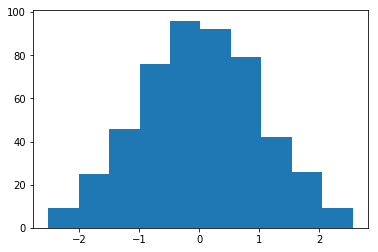

In [86]:
plt.hist(z_grupos2["Income"]) #Se pueden ver los valores de la columna "Income" estandarizados

In [87]:
# Ejemplo 2 : Se quieren llenar los na's con la media de las columnas
#Creacion de la funcion lambda
rellenar = lambda x: x.fillna(numpy.mean(x))

In [88]:
grupos2.transform(rellenar)

,Age,Height,Weight,Income
0,29.0,175.922503,64.465363,14280.507490
1,41.0,208.891053,55.104188,25012.743979
2,41.0,156.324299,33.381430,14604.274394
3,19.0,135.491864,71.297586,21585.904447
4,30.0,149.800307,61.724006,22286.705714
5,23.0,167.250905,85.149956,21853.360126
6,62.0,118.594106,63.456598,17463.019764
7,47.0,173.005725,29.696942,14590.192556
8,44.0,206.297086,62.644227,16738.042346
9,40.0,181.464021,99.907237,17062.080457


## Operaciones útiles diversas
head(), tail(), nth()

In [94]:
#Devuelve los primeros (n) elementos de cada uno de los 6 grupos
grupos2.head(1)

,Age,Gender,Economic Status,Height,Weight,Income
0,29.0,Male,Poor,175.922503,64.465363,14280.507490
1,41.0,Female,Poor,208.891053,55.104188,25012.743979
4,30.0,Female,Rich,149.800307,61.724006,22286.705714
6,62.0,Female,Middle Class,118.594106,63.456598,17463.019764
7,47.0,Male,Rich,173.005725,29.696942,14590.192556
11,37.0,Male,Middle Class,174.744322,111.282237,18630.869372


In [95]:
#Devuleve los ultimos (n) elementos de cada uno de los 6 grupos
grupos2.tail(2)

,Age,Gender,Economic Status,Height,Weight,Income
474,15.0,Male,Middle Class,214.594922,80.894752,16786.445180
479,33.0,Male,Middle Class,172.978315,87.683063,19355.758761
480,31.0,Male,Rich,110.620793,45.182586,19354.576469
488,16.0,Male,Rich,151.248392,72.334458,14559.851363
492,49.0,Female,Middle Class,149.238720,53.495726,17621.054002
493,28.0,Female,Poor,185.371734,69.873003,14434.264082
494,39.0,Female,Poor,149.584212,94.773277,16825.464988
495,32.0,Male,Poor,196.464938,50.267840,11676.312671
496,43.0,Female,Middle Class,159.425181,-7.140284,11166.876207
497,11.0,Female,Rich,137.697609,114.553262,19619.698683


In [101]:
#Devuelve el n-ésimo elemento de cada grupo
grupos2.nth(2)

Age      Height        Income     Weight
Gender Economic Status                                           
Female Middle Class     40.0  181.464021  17062.080457  99.907237
       Poor             23.0  167.250905  21853.360126  85.149956
       Rich             12.0  186.230736  18914.829443  76.189802
Male   Middle Class     31.0  201.060616  15758.630522  36.366333
       Poor             32.0  193.125246  20455.478925  70.958819
       Rich             23.0   76.140614  21948.287170  49.620083